# Importing Dependencies

In [1]:
# Importing NumPy for array handling
import numpy as np

# Importing Pandas for data manipulation and analysis
import pandas as pd

In [15]:
# California House Price Dataset is present in sklearn for education purposes
from sklearn.datasets import fetch_california_housing

# House Data Description

This dataset provides various features related to housing in different blocks. Below is an explanation of each attribute:

1. **Longitude**  
   A measure of how far west a house is. A higher value indicates the house is farther west.

2. **Latitude**  
   A measure of how far north a house is. A higher value indicates the house is farther north.

3. **HousingMedianAge**  
   The median age of houses within a block. A lower number suggests that the buildings are newer.

4. **TotalRooms**  
   The total number of rooms within a block.

5. **TotalBedrooms**  
   The total number of bedrooms within a block.

6. **Population**  
   The total number of people residing within a block.

7. **Households**  
   The total number of households, which refers to a group of people residing within a home unit, for a block.

8. **MedianIncome**  
   The median income for households within a block of houses, measured in tens of thousands of US Dollars.

9. **MedianHouseValue**  
   The median value of houses within a block, measured in US Dollars.

10. **OceanProximity**  
    The location of the house relative to the ocean/sea (e.g., near, inland, coastal).


In [16]:
# sneak peak into the data

#  housing.csv file to a DataFrame
df = pd.read_csv('housing.csv')

# Displaying the first 10 rows of the dataset
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [17]:
# Displaying the size of dataset (rows, columns)
print("\nSize of the dataset (rows, columns):")
print(df.shape)
print()
print(df.columns)


Size of the dataset (rows, columns):
(20640, 10)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [21]:
# Convert it to a DataFrame for easier manipulation
'''
# housing.data -> This is the dataset that contains the features for each house in the housing dataset. 
It is typically a 2D NumPy array, where each row corresponds to a house (or block) and each column corresponds to one feature
# housing.feature_names -> This is a list containing the names of the features (columns) 
'''
# loading dataset
housing = fetch_california_housing()

df = pd.DataFrame(housing.data, columns=housing.feature_names) # numpy array to pd dataframe
df['Price'] = housing.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [22]:
# Split the dataset into features (X) and target (y)
X = df.drop('Price', axis=1)
y = df['Price']

In [24]:
# splitting using sklearn
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Predict on the test set
y_pred = model.predict(X_test)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# printing metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.555891598695244
R-squared: 0.5757877060324511


In [29]:
# checking new df
# Price column added
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


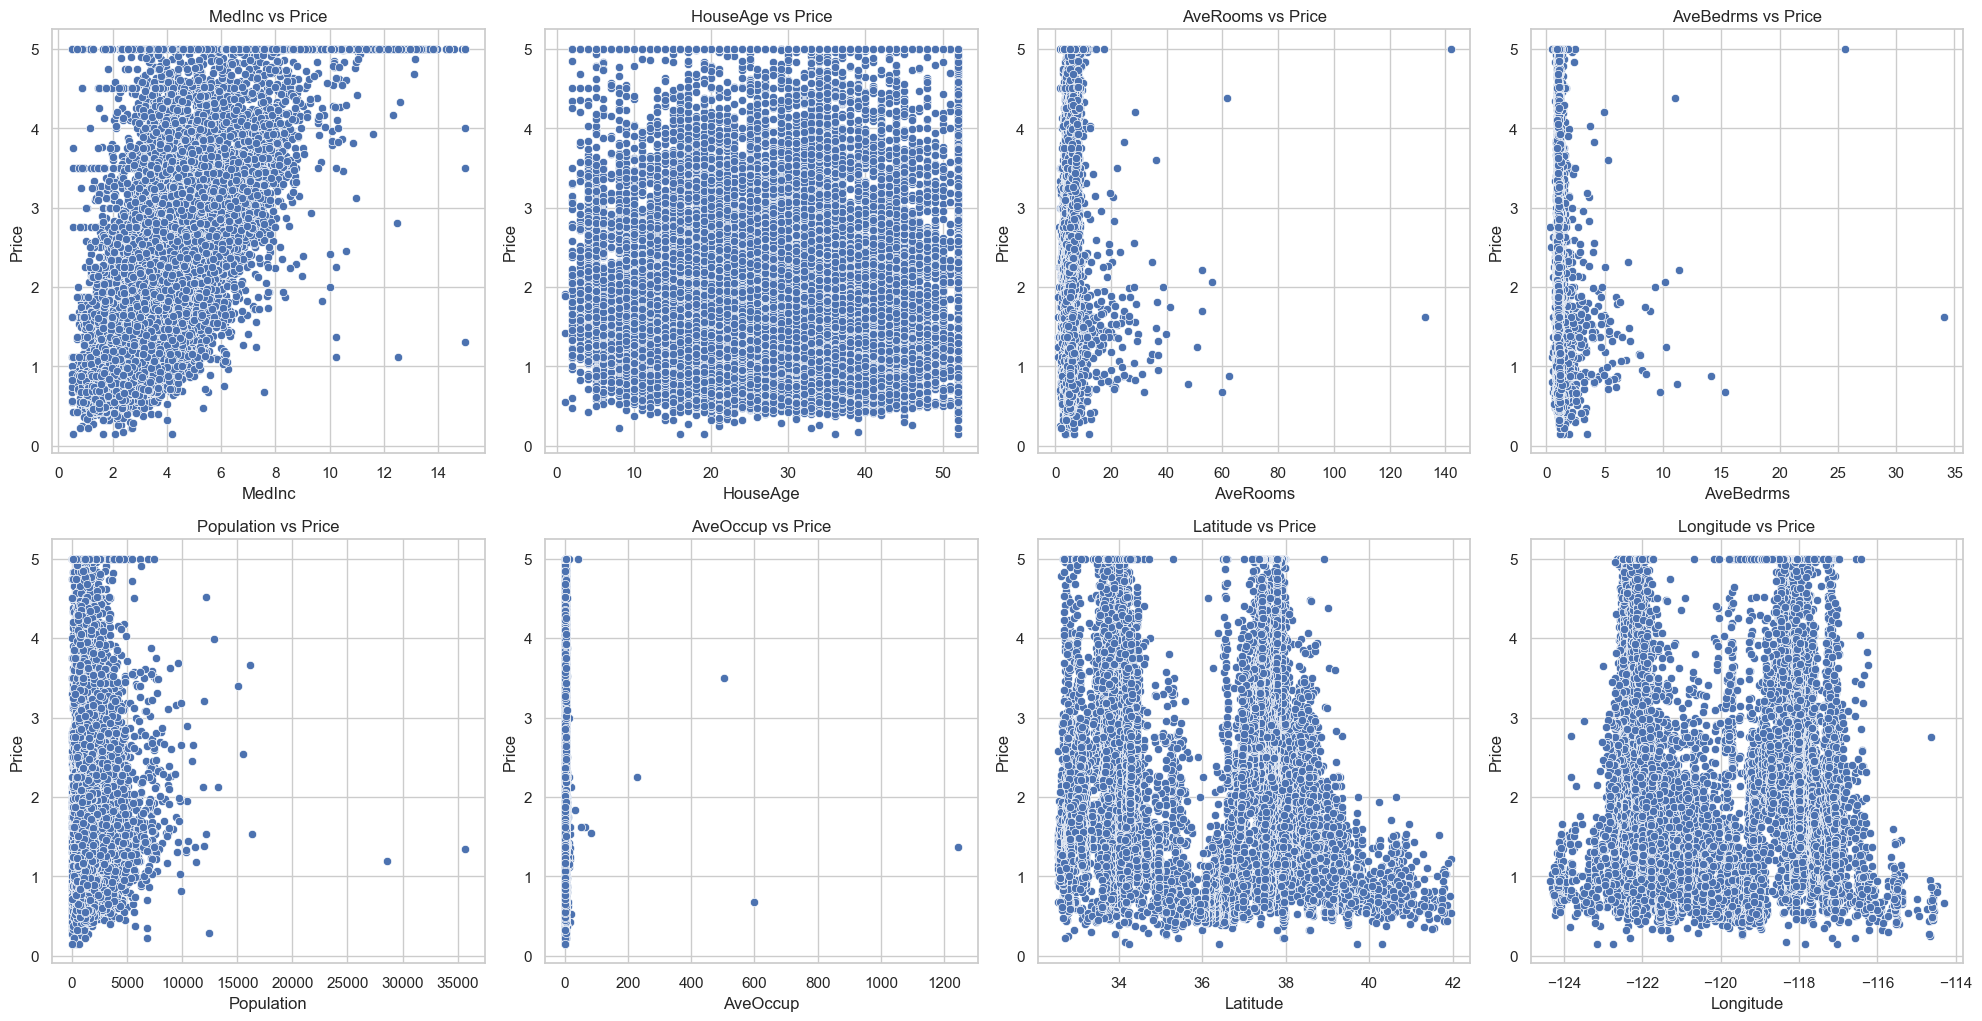

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set(style="whitegrid")

# Create a figure with subplots
plt.figure(figsize=(20, 15))

# Loop through each feature and create a scatter plot
for i, feature in enumerate(df.columns[:-1]):  # Exclude the 'Price' column
    plt.subplot(3, 4, i+1)  # Adjust grid size as needed (3x4 grid)
    sns.scatterplot(x=df[feature], y=df['Price'])
    plt.title(f'{feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')

# Adjust layout to prevent overlap
plt.tight_layout()

# saving plt
#plt.savefig('housing_features_vs_price.png', format='png')

# Show the plots
plt.show()
